# Churn Prediction in Telecom Industry Using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Loading of DataSet

In [2]:
df=pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

# Removing of Null Values

In [5]:
df=df.dropna()

In [6]:
df.shape

(7043, 21)

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.shape

(7043, 21)

In [12]:
for columns in df:
    print(columns)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [16]:
import matplotlib.pyplot as plt

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='tenure'>

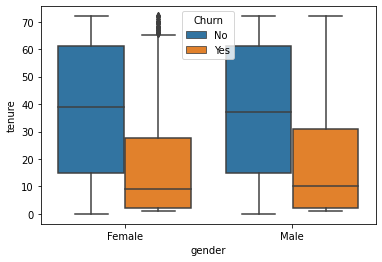

In [18]:
sns.boxplot(df['gender'],df['tenure'],hue=df['Churn'])

<AxesSubplot:ylabel='Churn'>

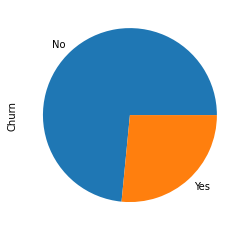

In [19]:
df['Churn'].value_counts().plot(kind='pie')

<AxesSubplot:>

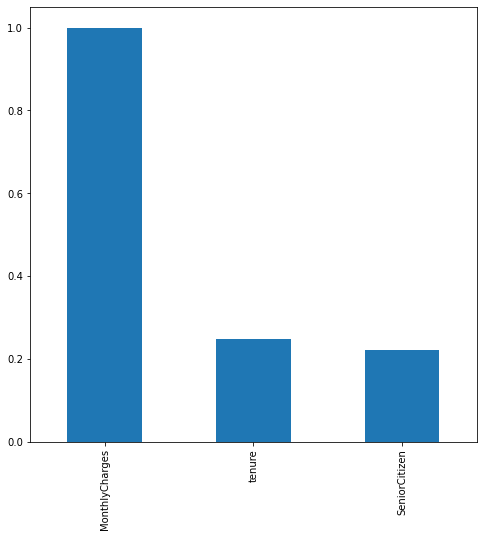

In [20]:
plt.figure(figsize=(8,8))
df.corr()['MonthlyCharges'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

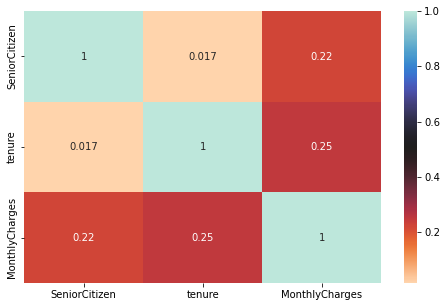

In [21]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),cmap='icefire_r',annot=True)

In [22]:
df=pd.get_dummies(df,columns=['Churn'],drop_first=True)

In [23]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


<AxesSubplot:>

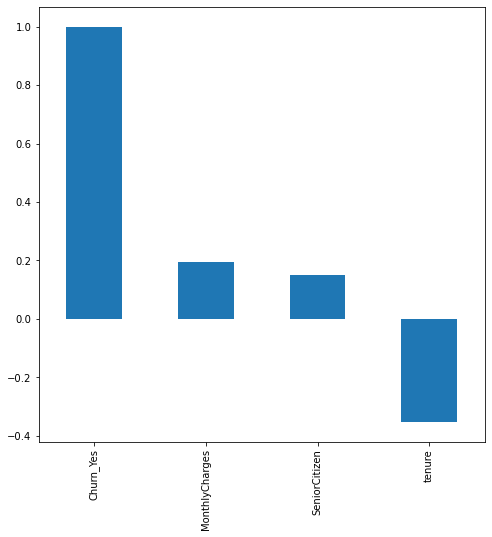

In [24]:
plt.figure(figsize=(8,8))
df.corr()['Churn_Yes'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

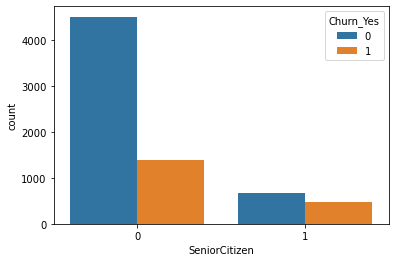

In [25]:
sns.countplot(data=df,x=df['SeniorCitizen'],hue=df['Churn_Yes'])

# Creating of dummy variables

In [26]:
df=pd.get_dummies(df,columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges'],drop_first=True)

In [27]:
df

,customerID,SeniorCitizen,tenure,MonthlyCharges,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,7590-VHVEG,0,1,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5575-GNVDE,0,34,56.95,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3668-QPYBK,0,2,53.85,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7795-CFOCW,0,45,42.30,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9237-HQITU,0,2,70.70,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,2234-XADUH,0,72,103.20,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7040,4801-JZAZL,0,11,29.60,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7041,8361-LTMKD,1,4,74.40,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Droping Of Column

In [28]:
df=df.drop(['customerID'],axis=1)

In [29]:
df.shape

(7043, 6560)

In [30]:
import matplotlib.pyplot as plt

# Splitting Of Data 

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x=df.drop(columns=['Churn_Yes'])
y=df['Churn_Yes']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [33]:
x_train

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
5748,0,21,99.85,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2797,0,3,100.95,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5745,0,61,24.20,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6504,0,3,79.25,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6534,1,53,96.75,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6283,0,3,99.00,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
290,1,24,76.10,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4033,0,67,60.05,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3410,0,3,53.40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
x_test

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
3781,0,29,19.10,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2580,1,30,101.30,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5974,0,10,20.05,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6373,0,44,92.95,1,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2460,0,48,19.55,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,0,1,44.55,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2951,0,20,64.15,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,0,69,110.05,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5066,0,44,54.30,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
x

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7039,0,72,103.20,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7040,0,11,29.60,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: uint8



# Normalization Of Data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
x_train_scaled =scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [39]:
x_train_scaled

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,-0.437173,-0.472805,1.157448,-1.010707,-0.972338,-0.651280,0.331226,-0.331226,1.162505,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
1,-0.437173,-1.205720,1.193850,0.989406,-0.972338,-0.651280,0.331226,-0.331226,1.162505,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
2,-0.437173,1.155897,-1.345970,-1.010707,1.028449,1.535438,0.331226,-0.331226,1.162505,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
3,-0.437173,-1.205720,0.475751,0.989406,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
4,2.287422,0.830156,1.054863,-1.010707,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,-0.437173,-1.205720,1.129320,-1.010707,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
5630,2.287422,-0.350652,0.371511,0.989406,-0.972338,-0.651280,0.331226,-0.331226,1.162505,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
5631,-0.437173,1.400202,-0.159618,0.989406,1.028449,1.535438,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
5632,-0.437173,-1.205720,-0.379680,0.989406,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0


In [40]:
x_test_scaled

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,-0.437173,-0.147064,-1.514740,0.989406,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
1,2.287422,-0.106347,1.205432,-1.010707,-0.972338,1.535438,0.331226,-0.331226,1.162505,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
2,-0.437173,-0.920698,-1.483302,0.989406,1.028449,1.535438,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
3,-0.437173,0.463699,0.929113,0.989406,1.028449,1.535438,0.331226,-0.331226,-0.860211,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
4,-0.437173,0.626569,-1.499848,-1.010707,1.028449,1.535438,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,-0.437173,-1.287156,-0.672545,-1.010707,-0.972338,-0.651280,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
1405,-0.437173,-0.513522,-0.023940,0.989406,1.028449,-0.651280,0.331226,-0.331226,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
1406,-0.437173,1.481637,1.494988,0.989406,-0.972338,-0.651280,0.331226,-0.331226,1.162505,1.130985,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0
1407,-0.437173,0.463699,-0.349897,0.989406,1.028449,-0.651280,-3.019089,3.019089,-0.860211,-0.884185,...,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,-0.013324,0.0,-0.013324,-0.013324,0.0


# Using Principal Component Analysis To Compress The Data

In [41]:
from sklearn.decomposition import PCA

In [42]:

pca=PCA(n_components=11)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

In [43]:
x_test_pca

array([[ 5.64021058e+00, -7.61600484e-01, -1.66685518e-01, ...,
        -1.06504506e-01, -7.20450798e-01, -1.76291170e-03],
       [-2.43266128e+00, -5.33799247e-01, -1.58720971e+00, ...,
         4.35052158e-01, -1.69574436e-01,  2.65854729e-01],
       [ 5.23508135e+00,  5.53117538e-01, -3.38066749e-01, ...,
        -5.14429759e-01, -6.82276247e-01, -4.75997504e-01],
       ...,
       [-2.78154095e+00,  2.33176206e+00, -8.21611142e-01, ...,
        -5.86919873e-01, -3.95013404e-01, -2.43879813e-01],
       [-1.43807109e+00,  9.45439852e-01,  3.49514335e+00, ...,
        -4.18720989e-01, -3.10469736e-01,  6.80410362e-01],
       [-2.52619807e+00, -1.19096992e+00, -1.90158451e+00, ...,
         2.36747024e-01, -1.77901553e-01,  6.59175534e-01]])

In [44]:
x_train_pca

array([[-2.36397783, -0.1637847 , -1.7145027 , ..., -1.22640624,
        -2.7095615 , -0.31042686],
       [-2.56002099, -1.70037683, -2.20685707, ..., -2.2843229 ,
        -0.25957022,  0.69930031],
       [ 5.86497913,  2.50068404, -0.91192829, ...,  1.82526722,
        -1.71922146, -1.54709545],
       ...,
       [-0.60642638,  1.77786683,  2.13877543, ...,  2.14209455,
         1.48834648, -0.83989632],
       [-0.27803835, -1.63334693,  0.68906198, ..., -2.31324554,
        -0.53228863,  1.51647758],
       [-0.89037976,  2.77206402,  0.38026328, ..., -1.21694787,
        -0.63654332,  2.71400824]])

 # Compressed  To  11  Rows From 6559 rows

In [45]:
x_train_scaled.shape

(5634, 6559)

In [46]:
x_train_pca.shape

(5634, 11)

# Using Logistic Regression 

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log = LogisticRegression()
log.fit(x_train_pca, y_train)

LogisticRegression()

In [49]:
y_pred = log.predict(x_test_pca)


In [50]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100


77.85663591199432

In [52]:
from sklearn.metrics import confusion_matrix

# To Check Which n_component Of PCA gives Highest Accuracy

In [53]:
for i in range(1,6559):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_scaled)
    x_test_pca=pca.transform(x_test_scaled)
    log = LogisticRegression()
    log.fit(x_train_pca, y_train)
    y_pred = log.predict(x_test_pca)
    print(i)
    print(accuracy_score(y_test, y_pred)*100)


1
73.52732434350602
2
77.2888573456352
3
77.64371894960965
4
77.57274662881476
5
77.71469127040454
6
77.85663591199432
7
77.85663591199432
8
77.71469127040454
9
77.71469127040454
10
77.64371894960965
11
77.64371894960965
12
77.64371894960965
13
77.71469127040454
14
77.57274662881476
15
77.9985805535841
16
78.28246983676365
17
77.9985805535841
18
77.71469127040454
19
77.78566359119942
20
77.9985805535841
21
77.92760823278921
22
77.92760823278921
23
77.71469127040454
24
77.85663591199432
25
77.92760823278921
26
77.78566359119942
27
77.71469127040454
28
77.9985805535841
29
77.92760823278921
30
78.21149751596877
31
78.06955287437899
32
77.71469127040454
33
77.92760823278921
34
78.06955287437899
35
77.9985805535841
36
77.92760823278921
37
78.06955287437899
38
77.85663591199432
39
78.06955287437899
40
77.9985805535841
41
78.14052519517388
42
77.85663591199432
43
77.9985805535841
44
77.71469127040454
45
78.35344215755855
46
78.21149751596877
47
77.92760823278921
48
77.9985805535841
49
77.7146

KeyboardInterrupt: 